In [1]:
import tensorflow as tf
import image_dataset_utils as utils
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

tf.get_logger().setLevel('ERROR')

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [2]:
class Config:
    AUGMENTATIONS = 5
    BATCH_SIZE = 32

print("Config:")
for key, value in Config.__dict__.items():
    if not key.startswith('__'):
        print(f"{key}: {value}")

Config:
AUGMENTATIONS: 5
BATCH_SIZE: 32


In [3]:
preprocessed_train_data = utils.load_and_preprocess_image_data("cars/train", Config.BATCH_SIZE)
preprocessed_val_data = utils.load_and_preprocess_image_data("cars/val", Config.BATCH_SIZE)

print("Train data:")
utils.show_dataset_info(preprocessed_train_data)

print("\nValidation data:")
utils.show_dataset_info(preprocessed_val_data)

Found 12 files belonging to 3 classes.
Found 3 files belonging to 3 classes.
Train data:
<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
Class names: ['ces', 'jct', 'yuu']
Total number of images in the dataset: 12
Images shape: (12, 128, 128, 3)
Labels shape: (12,)
Images dtype: <dtype: 'float32'>
Labels dtype: <dtype: 'int32'>
Images mean: tf.Tensor(0.45368534, shape=(), dtype=float32)


Validation data:
<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
Class names: ['ces', 'jct', 'yuu']
Total number of images in the dataset: 3
Images shape: (3, 128, 128, 3)
Labels shape: (3,)
Images dtype: <dtype: 'float32'>
Labels dtype: <dtype: 'int32'>
Images mean: tf.Tensor(0.46035153, shape=(), dtype=float32)



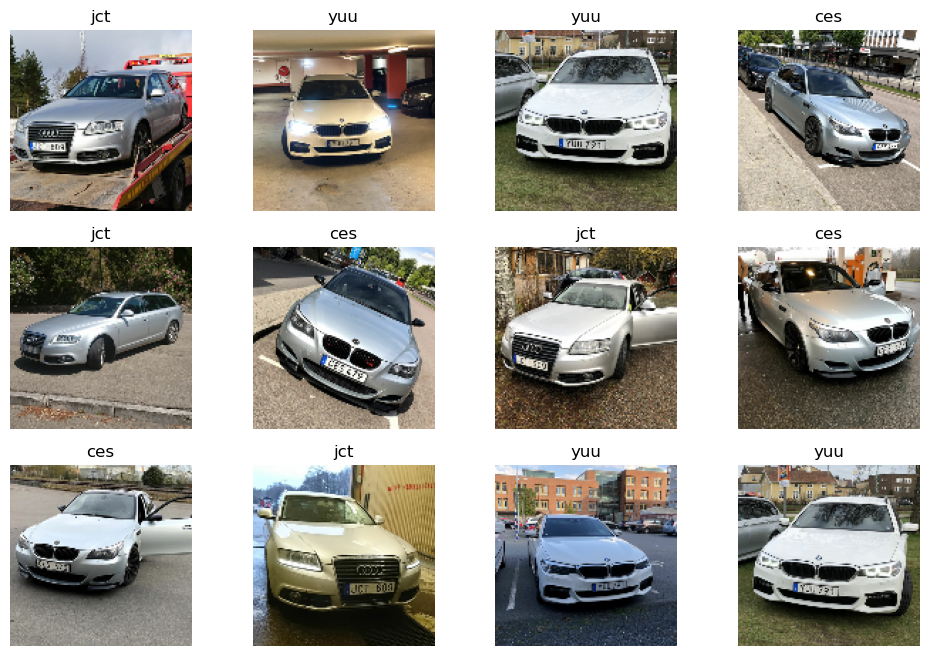

In [4]:
utils.show_images(preprocessed_train_data, preprocessed_train_data.class_names)

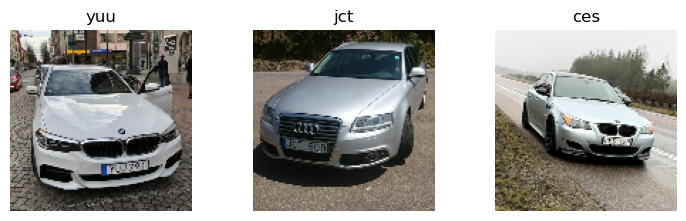

In [5]:
utils.show_images(preprocessed_val_data, preprocessed_val_data.class_names)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
Class names: ['ces', 'jct', 'yuu']
Total number of images in the dataset: 72
Images shape: (32, 128, 128, 3)
Labels shape: (32,)
Images dtype: <dtype: 'float32'>
Labels dtype: <dtype: 'int32'>
Images mean: tf.Tensor(0.44515884, shape=(), dtype=float32)



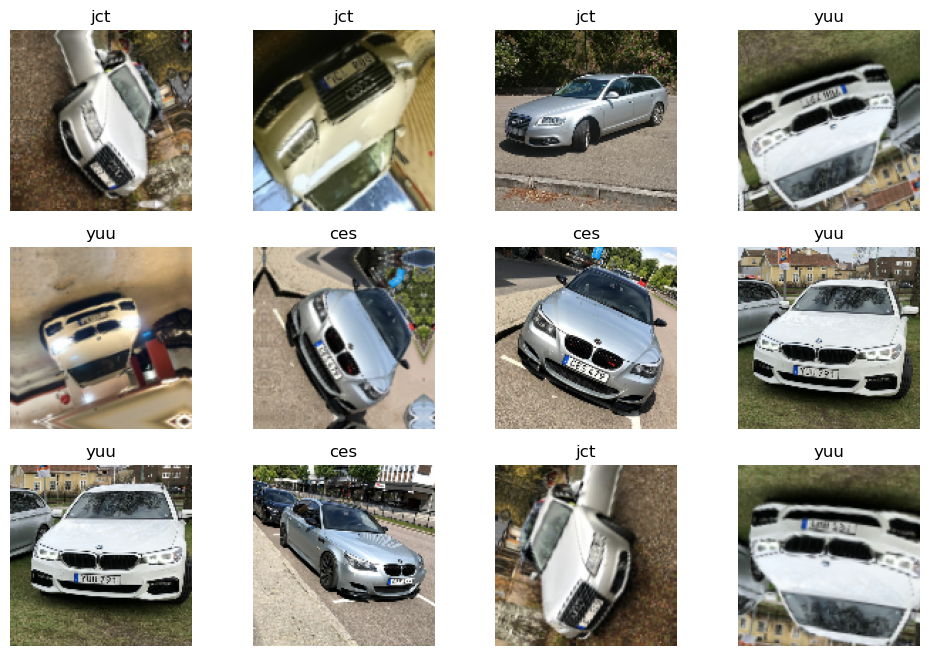

In [6]:
augmented_train_data = utils.augment_image_dataset(preprocessed_train_data, Config.AUGMENTATIONS, Config.BATCH_SIZE)
utils.show_dataset_info(augmented_train_data)
utils.show_images(augmented_train_data, augmented_train_data.class_names)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
Class names: ['ces', 'jct', 'yuu']
Total number of images in the dataset: 18
Images shape: (18, 128, 128, 3)
Labels shape: (18,)
Images dtype: <dtype: 'float32'>
Labels dtype: <dtype: 'int32'>
Images mean: tf.Tensor(0.46070135, shape=(), dtype=float32)



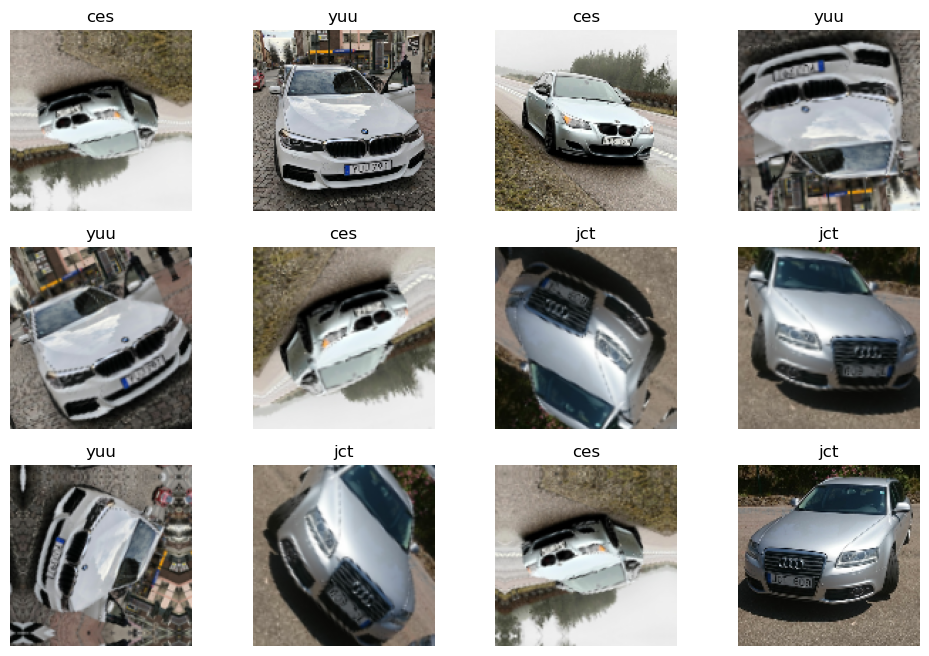

In [7]:
augmented_val_data = utils.augment_image_dataset(preprocessed_val_data, Config.AUGMENTATIONS, Config.BATCH_SIZE)
utils.show_dataset_info(augmented_val_data)
utils.show_images(augmented_val_data, augmented_val_data.class_names)

In [8]:
tf.data.Dataset.save(augmented_train_data, "augmented_cars")

<class 'tensorflow.python.data.ops.load_op._LoadDataset'>
Total number of images in the dataset: 72
Images shape: (32, 128, 128, 3)
Labels shape: (32,)
Images dtype: <dtype: 'float32'>
Labels dtype: <dtype: 'int32'>
Images mean: tf.Tensor(0.46053576, shape=(), dtype=float32)



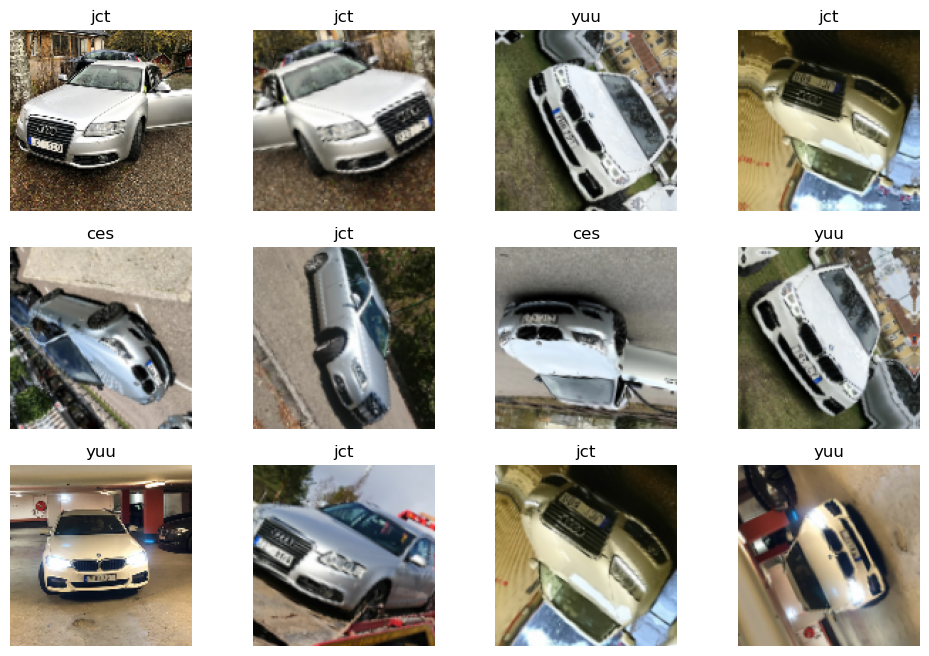

In [9]:
loaded_dataset = tf.data.Dataset.load("augmented_cars")
utils.show_dataset_info(loaded_dataset)
utils.show_images(loaded_dataset, ['ces', 'jct', 'yuu'])

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
Total number of images in the dataset: 5
Images shape: (5, 128, 128, 3)
Labels shape: (5,)
Images dtype: <dtype: 'float32'>
Labels dtype: <dtype: 'int32'>
Images mean: tf.Tensor(0.47638905, shape=(), dtype=float32)



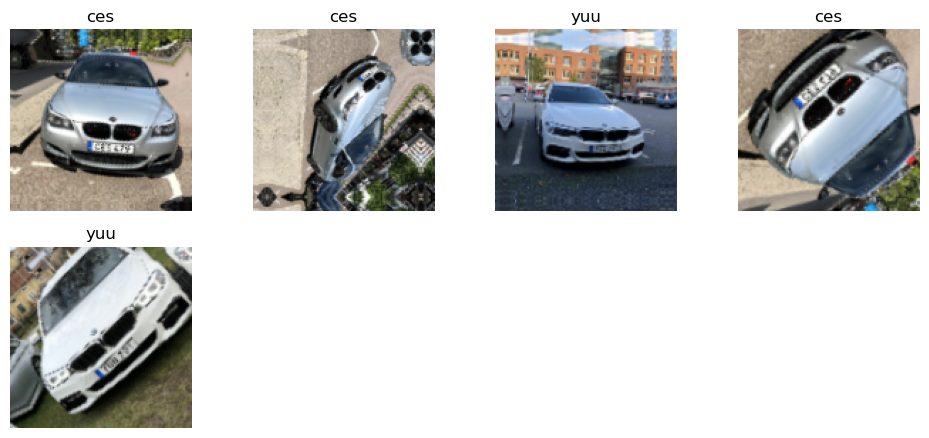

In [ ]:
loaded_dataset.unbatch().take(4).shuffle(1000).batch(Config.BATCH_SIZE)
